In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display

In [808]:
file_names = ['hdl.csv']
df_list = []
closed_df_list = []

In [809]:
for f in file_names:
    name = f.split(sep='.')[0]
    df = pd.read_csv(f,index_col=0)
    df['Date'] = pd.to_datetime(df['Date'])
    df_list.append((name,df))

In [810]:
for name,df in df_list:
    print(name)
    display(df.head())

hdl


,Date,Total Transactions,Total Traded Shares,Total Traded Amount,Max. Price,Min. Price,Close Price
S.N.,,,,,,,
1,2021-01-17,454,27907,122494095.0,4475,4290,4465
2,2021-01-13,401,28468,121085889.0,4320,4171,4320
3,2021-01-12,221,12601,52487661.0,4195,4146,4170
4,2021-01-11,433,26572,111471098.0,4300,4129,4175
5,2021-01-10,468,30230,130494510.0,4386,4235,4250


In [811]:
for name,df in df_list:
    
    closed_price_df = df[['Date','Close Price']]
    closed_df_list.append((name,closed_price_df))
    print(name)
    display(closed_price_df.head())

hdl


,Date,Close Price
S.N.,,
1,2021-01-17,4465
2,2021-01-13,4320
3,2021-01-12,4170
4,2021-01-11,4175
5,2021-01-10,4250


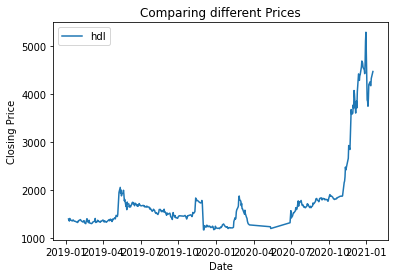

In [812]:
for name,df in closed_df_list:
    
    plt.plot(df['Date'],df['Close Price'],label=name)
    
plt.title('Comparing different Prices')
plt.xlabel("Date")
plt.legend()
plt.ylabel("Closing Price")

plt.show()

In [813]:
fig = go.Figure()
for name,df in closed_df_list:
    fig = fig.add_trace(go.Scatter(x=df['Date'],y=df['Close Price'],name=name))
fig.show()

In [814]:
name,df = df_list[0]

In [815]:
df.head()

,Date,Total Transactions,Total Traded Shares,Total Traded Amount,Max. Price,Min. Price,Close Price
S.N.,,,,,,,
1,2021-01-17,454,27907,122494095.0,4475,4290,4465
2,2021-01-13,401,28468,121085889.0,4320,4171,4320
3,2021-01-12,221,12601,52487661.0,4195,4146,4170
4,2021-01-11,433,26572,111471098.0,4300,4129,4175
5,2021-01-10,468,30230,130494510.0,4386,4235,4250


In [816]:
df.describe()

,Total Transactions,Total Traded Shares,Total Traded Amount,Max. Price,Min. Price,Close Price
count,413.000000,413.000000,4.130000e+02,413.000000,413.000000,413.000000
mean,178.825666,18321.467312,4.031966e+07,1841.946731,1771.118644,1806.956416
std,258.060388,27992.568250,6.750377e+07,834.828339,770.481663,807.245200
min,1.000000,10.000000,1.306000e+04,1180.000000,1123.000000,1176.000000
25%,10.000000,620.000000,9.394100e+05,1390.000000,1360.000000,1372.000000
50%,67.000000,6274.000000,1.006021e+07,1618.000000,1575.000000,1599.000000
75%,226.000000,25495.000000,4.364364e+07,1825.000000,1760.000000,1787.000000
max,1635.000000,244568.000000,4.688189e+08,5607.000000,5221.000000,5280.000000


Timestamp('2021-01-12 00:00:00')

In [817]:
df_avg = df[['Date','Total Transactions', 'Total Traded Shares', 'Total Traded Amount','Close Price']]
df_avg.head()

,Date,Total Transactions,Total Traded Shares,Total Traded Amount,Close Price
S.N.,,,,,
1,2021-01-17,454,27907,122494095.0,4465
2,2021-01-13,401,28468,121085889.0,4320
3,2021-01-12,221,12601,52487661.0,4170
4,2021-01-11,433,26572,111471098.0,4175
5,2021-01-10,468,30230,130494510.0,4250


In [818]:
roll = 10
avg_array = []
for i in range(0,len(df)-roll-1):
    del_alpha = 1/(roll+1)
    alpha = del_alpha
    total_weight = 0
    avg_transactions = 0
    avg_total_traded_shares = 0
    avg_total_traded_amt = 0
    avg_max_amt = 0
    avg_min_amt = 0
    for j in range(roll):
        avg_transactions += alpha*df.iloc[i+j,1] 
        avg_total_traded_shares += alpha*df.iloc[i+j,2] 
        avg_total_traded_amt += alpha*df.iloc[i+j,3] 
        avg_max_amt += alpha*df.iloc[i+j,4] 
        avg_min_amt += alpha*df.iloc[i+j,5] 
        # print(alpha,del_alpha)
        alpha += del_alpha
        total_weight += alpha
        
    # break
    avg_array.append([df.iloc[i+roll-1,0],avg_transactions/total_weight,avg_total_traded_shares/total_weight,avg_total_traded_amt/total_weight,avg_max_amt/total_weight,avg_min_amt/total_weight,df.iloc[i+roll-1,6]])
    # avg_array.append([df.iloc[i+roll-1,0],avg_transactions,avg_total_traded_shares,avg_total_traded_amt,df.iloc[i+roll-1,4],df.iloc[i+roll-1,5],df.iloc[i+roll-1,6]])

df_avg = pd.DataFrame(avg_array,columns=['Date','Total Transactions', 'Total Traded Shares', 'Total Traded Amount','Max. Price','Min. Price','Close Price'])
df_avg.head()
    


,Date,Total Transactions,Total Traded Shares,Total Traded Amount,Max. Price,Min. Price,Close Price
0,2021-01-03,436.353846,27999.938462,1.122337e+08,3468.415385,3292.261538,3872
1,2020-12-31,612.923077,36626.923077,1.647126e+08,3687.815385,3481.076923,5280
2,2020-12-30,685.938462,39813.261538,1.838474e+08,3811.492308,3571.569231,5098
3,2020-12-29,670.969231,40332.969231,1.872185e+08,3861.969231,3615.846154,4635
4,2020-12-28,616.538462,36546.969231,1.700787e+08,3873.907692,3650.600000,4420


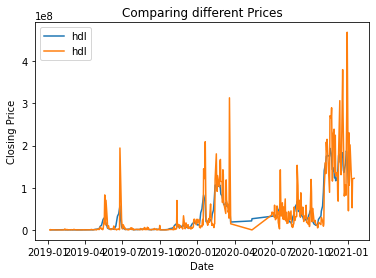

In [819]:
plt.plot(df_avg['Date'],df_avg['Total Traded Amount'],label=name)
plt.plot(df['Date'],df['Total Traded Amount'],label=name)
    
plt.title('Comparing different Prices')
plt.xlabel("Date")
plt.legend()
plt.ylabel("Closing Price")

plt.show()

In [820]:
X = df_avg[['Total Transactions', 'Total Traded Shares', 'Total Traded Amount','Max. Price','Min. Price']]
y = df_avg['Close Price']

In [821]:
X.head()

,Total Transactions,Total Traded Shares,Total Traded Amount,Max. Price,Min. Price
0,436.353846,27999.938462,1.122337e+08,3468.415385,3292.261538
1,612.923077,36626.923077,1.647126e+08,3687.815385,3481.076923
2,685.938462,39813.261538,1.838474e+08,3811.492308,3571.569231
3,670.969231,40332.969231,1.872185e+08,3861.969231,3615.846154
4,616.538462,36546.969231,1.700787e+08,3873.907692,3650.600000


In [822]:
y.head()

0    3872
1    5280
2    5098
3    4635
4    4420
Name: Close Price, dtype: int64

In [823]:
from sklearn.preprocessing import StandardScaler

In [824]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error as MSE

In [825]:
len(X)

402

In [826]:
test_size = 0.2
len_train_size = int(len(X) - (len(X)*test_size))
len_train_size

321

In [827]:
X_train = X[:len_train_size]
y_train = y[:len_train_size]
X_test = X[len_train_size:]
y_test = y[len_train_size:]

In [828]:
X_train

,Total Transactions,Total Traded Shares,Total Traded Amount,Max. Price,Min. Price
0,436.353846,27999.938462,1.122337e+08,3468.415385,3292.261538
1,612.923077,36626.923077,1.647126e+08,3687.815385,3481.076923
2,685.938462,39813.261538,1.838474e+08,3811.492308,3571.569231
3,670.969231,40332.969231,1.872185e+08,3861.969231,3615.846154
4,616.538462,36546.969231,1.700787e+08,3873.907692,3650.600000
...,...,...,...,...,...
316,15.015385,1430.230769,2.471529e+06,1463.507692,1429.692308
317,15.000000,1304.584615,2.249901e+06,1455.953846,1423.107692
318,16.184615,1258.630769,2.161143e+06,1450.569231,1417.292308
319,16.461538,1139.138462,1.952020e+06,1450.876923,1412.707692


In [829]:
y_train

0      3872
1      5280
2      5098
3      4635
4      4420
       ... 
316    1652
317    1680
318    1650
319    1715
320    1720
Name: Close Price, Length: 321, dtype: int64

In [830]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# X_train_scaled[:,3] = X_train['Max. Price']
# X_train_scaled[:,4] = X_train['Min. Price']
X_train_scaled

array([[ 1.35354369,  0.49634166,  1.42820468,  2.60783713,  2.66793118],
       [ 2.29740045,  0.97311251,  2.48188633,  2.9137283 ,  2.95464176],
       [ 2.68770665,  1.14920571,  2.86607706,  3.08616075,  3.09205166],
       ...,
       [-0.89248507, -0.98151839, -0.78184969, -0.20547789, -0.17915419],
       [-0.89100477, -0.98812214, -0.78604849, -0.2050489 , -0.18611579],
       [-0.85958948, -0.97425231, -0.77709358, -0.17924516, -0.18555512]])

In [831]:
X_train_scaled

array([[ 1.35354369,  0.49634166,  1.42820468,  2.60783713,  2.66793118],
       [ 2.29740045,  0.97311251,  2.48188633,  2.9137283 ,  2.95464176],
       [ 2.68770665,  1.14920571,  2.86607706,  3.08616075,  3.09205166],
       ...,
       [-0.89248507, -0.98151839, -0.78184969, -0.20547789, -0.17915419],
       [-0.89100477, -0.98812214, -0.78604849, -0.2050489 , -0.18611579],
       [-0.85958948, -0.97425231, -0.77709358, -0.17924516, -0.18555512]])

In [832]:
scaler.mean_

array([1.83143638e+02, 1.90188275e+04, 4.11014342e+07, 1.59794795e+03,
       1.53527563e+03])

In [833]:
model = RandomForestRegressor(n_estimators=200,max_depth=100,bootstrap=True)
model.fit(X_train,y_train)



RandomForestRegressor(max_depth=100, n_estimators=200)

In [834]:
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test)

In [835]:

rmse = MSE(y_pred,y_test)**(1/2)
rmse


120.28995616559592

In [836]:
df_avg[df_avg['Date'].index>=len_train_size]

,Date,Total Transactions,Total Traded Shares,Total Traded Amount,Max. Price,Min. Price,Close Price
321,2019-05-29,25.569231,2029.384615,3.502262e+06,1472.769231,1400.969231,1755
322,2019-05-28,27.707692,2110.984615,3.620461e+06,1469.015385,1389.446154,1596
323,2019-05-27,29.230769,2169.661538,3.718349e+06,1470.307692,1392.692308,1680
324,2019-05-26,54.692308,4000.646154,6.976511e+06,1507.261538,1394.353846,1666
325,2019-05-23,68.092308,9491.538462,1.689625e+07,1521.384615,1409.307692,1809
...,...,...,...,...,...,...,...
397,2019-01-16,2.400000,117.461538,1.615310e+05,1167.307692,1141.061538,1370
398,2019-01-15,3.092308,148.615385,2.038911e+05,1169.123077,1143.123077,1362
399,2019-01-10,3.092308,141.461538,1.943767e+05,1174.800000,1149.353846,1389
400,2019-01-09,3.215385,126.923077,1.747906e+05,1184.415385,1150.830769,1414


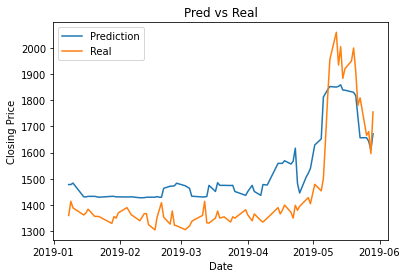

In [837]:
def plot_trend():
    plt.plot(df_avg[df_avg['Date'].index>=len_train_size]['Date'],y_pred,label='Prediction')
    plt.plot(df_avg[df_avg['Date'].index>=len_train_size]['Date'],y_test,label='Real')
    # plt.plot(df['Date'],df['Close Price'],label=name)
        
    plt.title('Pred vs Real')
    plt.xlabel("Date")
    plt.legend()
    plt.ylabel("Closing Price")

    plt.show()
plot_trend()

In [838]:
model.feature_importances_

array([0.00579656, 0.00345152, 0.00577497, 0.45965609, 0.52532086])

In [839]:
svr = SVR()
svr.fit(X_train,y_train)

SVR()

In [840]:
X_test_scaled = scaler.transform(X_test)
# X_test_scaled[:,3] = X_test['Max. Price']
# X_test_scaled[:,4] = X_test['Min. Price']
y_pred = svr.predict(X_test)

In [841]:

rmse = MSE(y_pred,y_test)**(1/2)
rmse


269.15261689605876

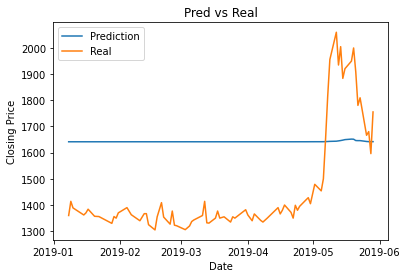

In [842]:
plot_trend()

In [843]:
from sklearn.ensemble import GradientBoostingRegressor

In [844]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [845]:
X_test_scaled = scaler.transform(X_test)
# X_test_scaled[:,3] = X_test['Max. Price']
# X_test_scaled[:,4] = X_test['Min. Price']
y_pred = gb.predict(X_test)

In [846]:

rmse = MSE(y_pred,y_test)**(1/2)
rmse


82.42818184760306

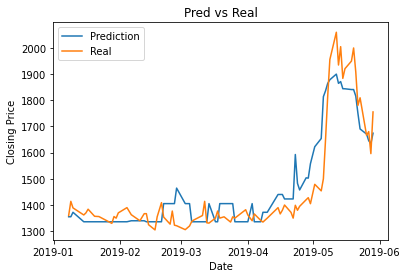

In [847]:
plot_trend()
